<a href="https://colab.research.google.com/github/NMPau/hw/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22homework2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

In [ ]:
from scipy.stats.contingency import expected_freq
from scipy.stats import exponpow
#  распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.exponpow.html#scipy.stats.exponpow
b = 2.7
mean, var, skew, kurt = exponpow.stats(b, moments='mvsk')
ex = sts.exponpow(b)
r = exponpow.rvs(b, size=100)

In [ ]:
r.dtype

dtype('float64')

In [ ]:
real_mean = r.mean() # настоящее среднее случайной величины
real_mean

0.7599465257260847

In [ ]:
real_var = r.var() # настоящая дисперсия случайной величины
real_var

0.04931693910941982

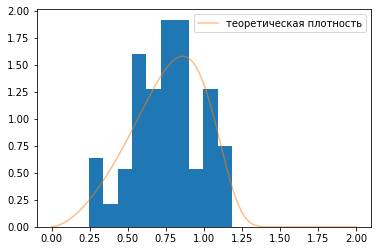

In [ ]:
plt.hist(r, density=True)
x = np.linspace(0,2,100)
pdf = ex.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [ ]:
r_mean = r.mean() # выборочное среднее
print(r_mean)
r_var = r.var() # выборочная дисперсия
print(r_var)

0.7599465257260847
0.04931693910941982


In [ ]:
N = 100
means = []
for i in range(10000):
    means.append(np.mean(ex.rvs(N)))

(array([ 0.03284874,  0.03284874,  0.        ,  0.09854623,  0.03284874,
         0.06569749,  0.19709247,  0.16424372,  0.32848745,  0.62412615,
         0.75552113,  0.78836987,  0.98546234,  1.2482523 ,  2.06947091,
         2.33226087,  3.05493325,  4.50027802,  5.12440417,  5.94562278,
         5.94562278,  7.68660625,  8.9020098 , 10.77438825, 10.21595959,
        12.12118678, 12.35112799, 15.47175873, 15.93164116, 15.86594367,
        15.53745622, 16.55576731, 16.6214648 , 14.58484263, 14.61769137,
        14.94617882, 13.04095163, 13.50083405, 10.57729578, 10.31450582,
         7.62090876,  7.6537575 ,  5.91277404,  5.55143785,  4.17179057,
         3.28487447,  3.02208451,  2.00377342,  1.51104225,  0.98546234,
         0.88691611,  0.62412615,  0.52557991,  0.26278996,  0.13139498,
         0.03284874,  0.19709247,  0.        ,  0.03284874,  0.03284874,
         0.06569749,  0.        ,  0.        ,  0.        ,  0.        ,
         0.03284874]),
 array([0.67098196, 0.674026

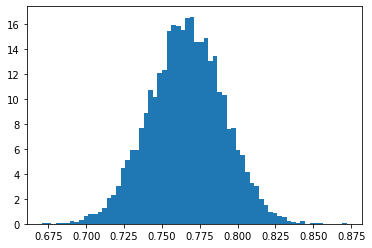

In [ ]:
plt.hist(means, density=True, bins='auto')

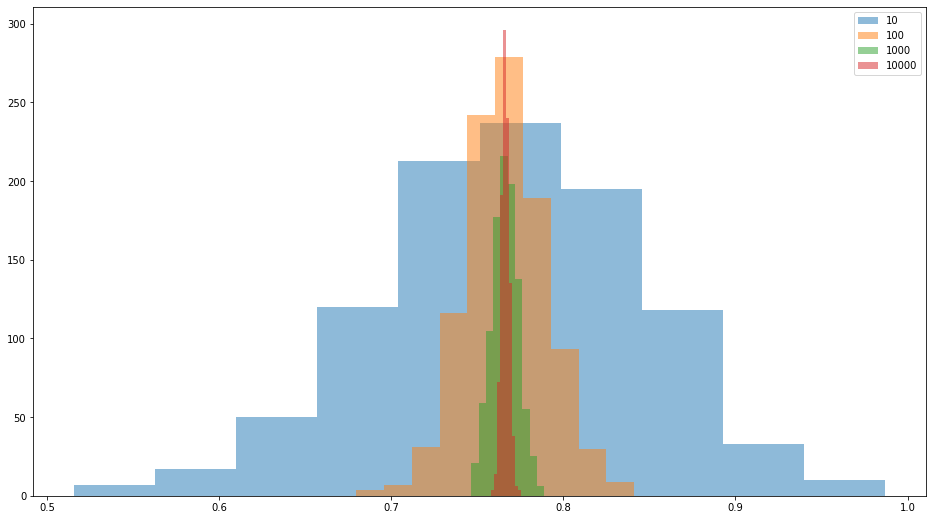

In [ ]:
plt.figure(figsize=(16,9))
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(ex.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [ ]:
N = 30
means = []
for i in range(1000):
    means.append(np.mean(ex.rvs(N)))

means = np.array(means).astype(np.float32)

In [ ]:
ex.mean()

0.7663958507049858

In [ ]:
ex.var()

0.05892597835147462

In [ ]:
ex.std()

0.242746737056288

[]

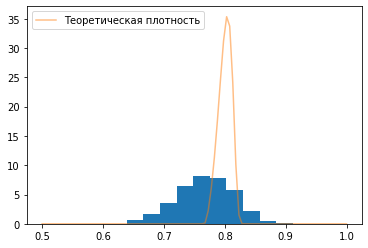

In [ ]:
ex = sts.exponpow(b, loc=ex.mean(), scale=ex.std() / np.sqrt(N))
plt.hist(means, density=True)
x = np.linspace(0.5,1,100)
pdf = ex.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

Для выбранного распределения апроксимация распределения выборочного среднего работает хорошо

In [2]:
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
df.shape

(3333, 21)

In [ ]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

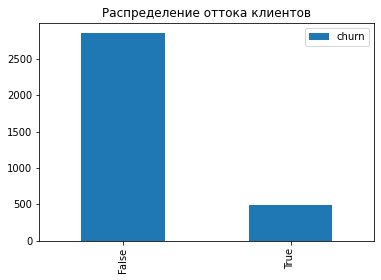

In [3]:
df['churn'].value_counts().plot(kind='bar', label='churn')
plt.legend()
plt.title('Распределение оттока клиентов');

In [4]:
df['total day calls'].mean()

100.43564356435644

In [19]:
n = df['total day calls'].count()

[]

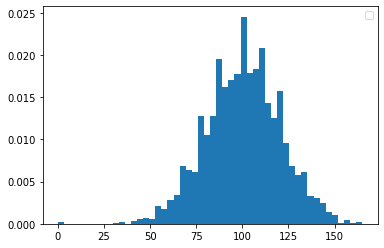

In [25]:
norm_rv = sts.norm(loc=df['total day calls'].mean(), scale=df['total day calls'].std() / np.sqrt(n))
plt.hist(df['total day calls'], density=True, bins=50)
plt.legend()
plt.plot()

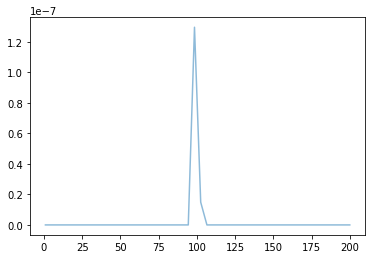

In [29]:
norm_rv = sts.norm(loc=df['total day calls'].mean(), scale=df['total day calls'].std() / np.sqrt(n))
x = np.linspace(1,200)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)

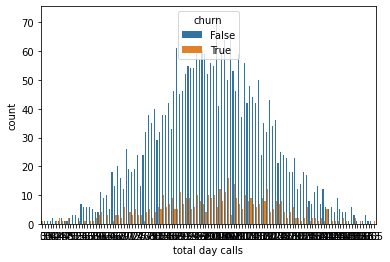

In [27]:
import seaborn as sns
sns.countplot(x='total day calls', hue='churn', data=df);

In [44]:
d = df['total day calls']

In [43]:
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(d) - 2 * df['total day calls'].std() / np.sqrt(n), np.mean(d) + 2 * df['total day calls'].std() / np.sqrt(n) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.74039533090719, 101.13089179780569] 


In [39]:
print("Доверительный интервал для среднего по цпт интервальная оценка: {} ".format(
    sts.norm.interval(alpha=0.95, loc=np.mean(d), 
                      scale=np.std(d, ddof=1)/np.sqrt(n)) # alternative 'two-sided' only
))

Доверительный интервал для среднего по цпт интервальная оценка: (99.75431281541863, 101.11697431329425) 


In [40]:
import statsmodels.stats.weightstats as ssw
from statsmodels.stats.weightstats import _zconfint_generic

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(d),  np.std(d, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт методом _zconfint_generic: (99.17717595744556, 101.69411117126732) 
